# Problem 1: EU Cities Temperature Dataset

In [514]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

eu_file = "EuCitiesTemperatures.csv" 
cities = pd.read_csv(eu_file)   # making dataframe from csv file
cities.head(12)  # printing the first few lines of the eu_cities dataset

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,NaN,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,NaN,27.57,5.28
8,Orsha,Belarus,9.48,no,no,NaN,NaN,4.93
9,Pinsk,Belarus,9.48,no,no,NaN,NaN,6.42


# Preprocessing/Analysis

1) Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

In [515]:
## Uncomment this block of code to see average latitude and longitude for each country 
## in order to verify the result printed by the last line of code in this cell
'''
print("Avg latitude for each country\n", round(cities.groupby('country', sort=False)['latitude'].mean(),2))
print("Avg longitude for each country\n", round(cities.groupby('country', sort=False)['longitude'].mean(),2))
'''
# group by 'country', find latitude/longitude mean for the country, round to 2 decimal places and 
# apply lambda for filling NaN values with the mean of latitude/longitude of corresponding country
cities['latitude'] = cities.groupby('country', sort=False)['latitude'].apply(lambda x: x.fillna(round(x.mean(),2))) 
cities['longitude'] = cities.groupby('country', sort=False)['longitude'].apply(lambda x: x.fillna(round(x.mean(),2)))
cities.head(12)  #printing the first few lines of the eu_cities dataset to show the updated values

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,14.02,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.63,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.63,6.42


2) Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) **and** longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [516]:
s1 = cities[(cities['latitude'] >= 40.0) & (cities['latitude'] <= 60.0)] #dataframe for cities between latitude 40 & 60 (both inclusive)
s1 = s1[(s1['longitude'] >= 15.0) & (s1['longitude'] <= 30.0)] #dataframe for cities between longitude 15 & 30 (both inclusive)

# now s1 represents the subset dataframe that lie between latitudes 40 to 60 (both inclusive) *AND* longitudes 15 to 30 (both inclusive)
#uncomment the following line to see all the dataset lying in this geographical band
#print(s1)

# grouping it by 'country' and counting how many cities in each country
s1 = s1.groupby('country', sort=False)['city'].count()

# now s1 is a series of total number of cities as values for each country as index that lie between the given latitude & longitude values 
#uncomment the following line to see all the countries in this geographical band
#print(s1)

for n, i in enumerate(s1.index):
    # finding and printing the names of the countries that have the max number of cities in this geographical band
    if s1.values[n] == s1.max():
        print(i, "has max cities that is:",s1.max())

Poland has max cities that is: 9
Romania has max cities that is: 9


3) Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='no' and coastline='yes')

In [517]:
## uncomment and run the following lines of code to see averages of each EU, coastline group
'''s1 = cities[(cities['EU'] == 'yes') & (cities['coastline'] == 'yes')]
s2 = cities[(cities['EU'] == 'yes') & (cities['coastline'] == 'no')]
s3 = cities[(cities['EU'] == 'no') & (cities['coastline'] == 'yes')]
s4 = cities[(cities['EU'] == 'no') & (cities['coastline'] == 'no')]
print("Avg temp for EU=yes, coast=yes: ",round(s1['temperature'].mean(),2))
print("Avg temp for EU=yes, coast=no: ",round(s2['temperature'].mean(),2))
print("Avg temp for EU=no, coast=yes: ",round(s3['temperature'].mean(),2))
print("Avg temp for EU=no, coast=no: ",round(s4['temperature'].mean(),2))
'''
cities['temperature'] = cities.groupby(['EU', 'coastline'], sort=False)['temperature'].apply(lambda x: x.fillna(round(x.mean(),2))) 
cities.loc[11:35,:] #printing few lines that show updates temperature values

,city,country,population,EU,coastline,latitude,longitude,temperature
11,Hrodna,Belarus,9.48,no,no,53.68,25.63,7.48
12,Mazyr,Belarus,9.48,no,no,52.05,25.63,6.25
13,Brugge,Belgium,11.37,yes,yes,51.22,3.23,9.65
14,Sarajevo,Bosnia and Herzegovina,3.80,no,yes,43.85,13.38,9.73
15,Plovdiv,Bulgaria,7.10,yes,yes,43.05,26.35,8.27
16,Burgas,Bulgaria,7.10,yes,yes,42.51,27.47,10.31
17,Pleven,Bulgaria,7.10,yes,yes,43.42,26.35,10.51
18,Ruse,Bulgaria,7.10,yes,yes,43.85,25.97,10.31
19,Stara Zagora,Bulgaria,7.10,yes,yes,42.42,25.62,10.90
20,Split,Croatia,4.23,yes,yes,45.33,16.47,12.46


# Visualization

1) Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

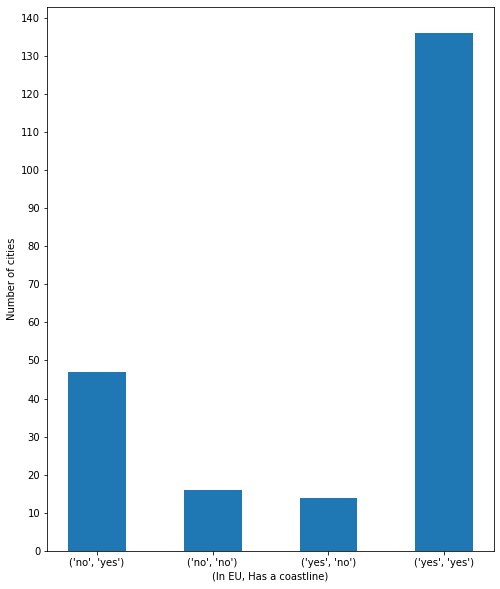

In [518]:
from matplotlib import pyplot as plt
total = cities.groupby(['EU', 'coastline'], sort=False)['city'].count()
x_ranges=[]
num_cities = []
for n, a in enumerate(total.index):
    x_ranges.append(total.index[n])
    num_cities.append(total.values[n])
plt.figure(figsize=(8,10))
plt.bar(range(len(num_cities)),num_cities, width=0.5)
plt.xticks(range(len(x_ranges)),x_ranges)
plt.yticks(range(0,141,10))
plt.xlabel('(In EU, Has a coastline)')
plt.ylabel('Number of cities')
plt.show()

2) Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

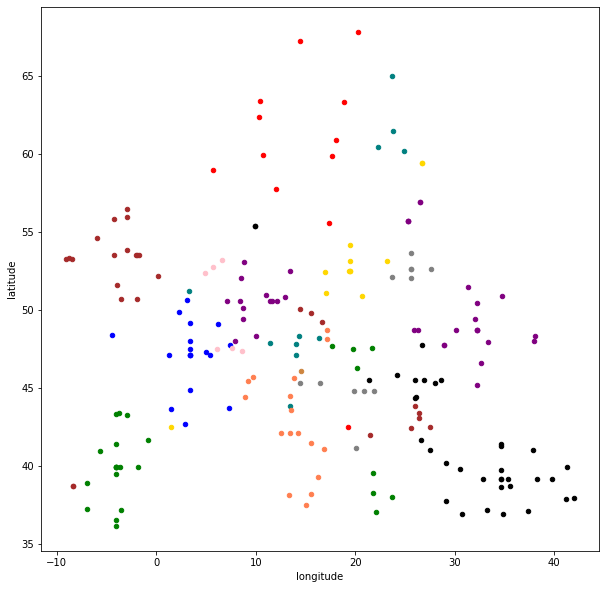

In [519]:
import random
import matplotlib.colors as mcolors
countries = cities['country'].unique()
colors=[]
for c in countries:
    # colors are allowed to be repeated and used for more than one country as per forums
    x=random.choice(['blue','red','green','teal','purple','brown','pink','peru','black','coral','gold', 'grey'])
    colors.append(x)
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
for country, color in zip(countries, colors):
    df = cities[cities['country'] == country]
    df.plot('longitude','latitude',ax=ax,kind='scatter',figsize=(10,10),color=color)

3) The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

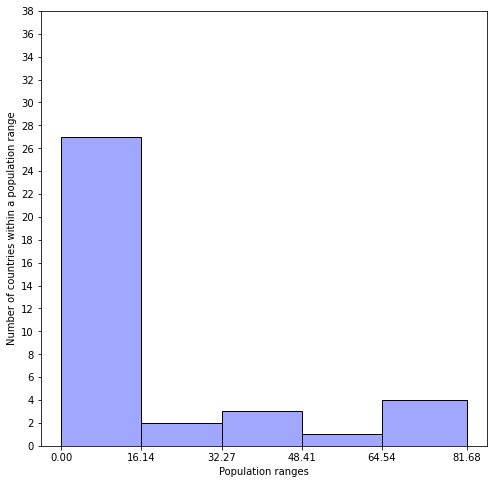

In [520]:
bins = np.arange(0,cities['population'].max()+1, cities['population'].max()/5)
bins[-1] = cities['population'].max()+1
#cities['bin'] = pd.cut(cities['population'],bins,labels=[1,2,3,4,5])
pop = cities['population'].unique()
k = np.arange(0, pop.size + 2, 2)
plt.figure(figsize=(8,8))
plt.hist(pop,bins ,color="#a1a7ff",edgecolor='black')
plt.xticks(bins)
plt.yticks(k)
plt.xlabel('Population ranges')
plt.ylabel('Number of countries within a population range')
plt.show()

4) Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.

<ipython-input-573-0dc710792ac9>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(x1)
<ipython-input-573-0dc710792ac9>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(x2)
<ipython-input-573-0dc710792ac9>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(x3)
<ipython-input-573-0dc710792ac9>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(x4)


Below are the subplots:


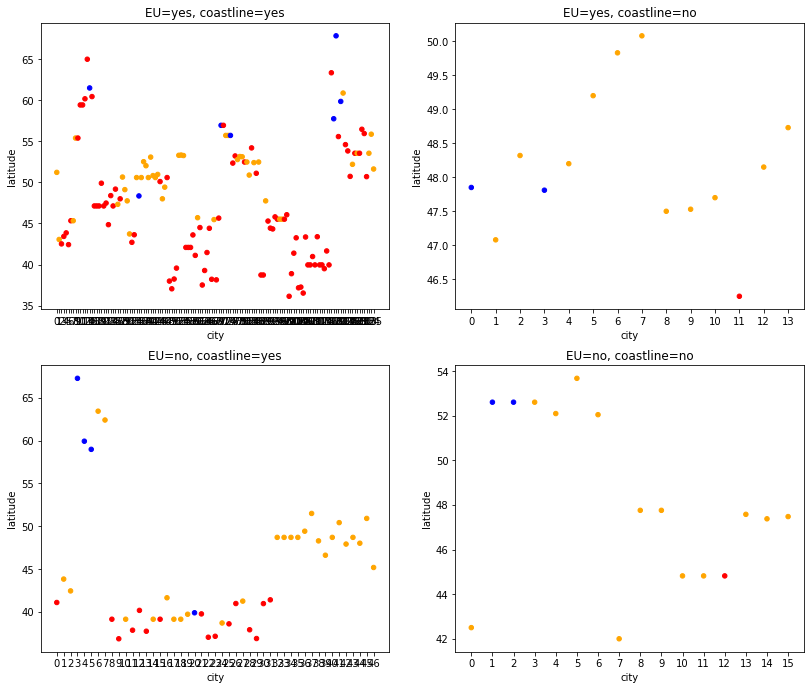

In [573]:
def temp(t):
    #print(t)
    if(t>10.0):
        return 'red'
    elif t<6.0:
        return 'blue'
    elif t>=6.0 and t<=10.0:
        return 'orange'

fig, axes = plt.subplots(2,2,figsize=(12,10), sharex=False)
d1 = cities[(cities['EU']=='yes') & (cities['coastline']=='yes')][['city', 'latitude', 'temperature']]
d1['color'] = d1['temperature'].apply(temp)
x1 = np.arange(0, d1['city'].count())
d2 = cities[(cities['EU']=='yes') & (cities['coastline']=='no')][['city', 'latitude', 'temperature']]
x2 = np.arange(0, d2['city'].count())
d2['color'] = d2['temperature'].apply(temp)
d3 = cities[(cities['EU']=='no') & (cities['coastline']=='yes')][['city', 'latitude', 'temperature']]
x3 = np.arange(0, d3['city'].count())
d3['color'] = d3['temperature'].apply(temp)
d4 = cities[(cities['EU']=='no') & (cities['coastline']=='no')][['city', 'latitude', 'temperature']]
x4 = np.arange(0, d4['city'].count())
d4['color'] = d4['temperature'].apply(temp)
fig.tight_layout(pad=3.5)
d1.plot('city','latitude', ax=axes[0,0], xlabel = 'city', ylabel = 'latitude',title = 'EU=yes, coastline=yes', kind='scatter', c = 'color')
axes[0,0].set_xticklabels(x1)
d2.plot('city','latitude', ax=axes[0,1], title = 'EU=yes, coastline=no', kind='scatter',  c = 'color')
axes[0,1].set_xticklabels(x2)
d3.plot('city','latitude', ax=axes[1,0], title = 'EU=no, coastline=yes', kind='scatter',  c = 'color')
axes[1,0].set_xticklabels(x3)
d4.plot('city','latitude', ax=axes[1,1], title = 'EU=no, coastline=no', kind='scatter', c = 'color')
axes[1,1].set_xticklabels(x4)
print("Below are the subplots:")